# Exploitation des résultats

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import datetime

## Fusion des différents .csv

In [3]:
data_path = Path("C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats/resultats_fin")
file_names = ["results_api_sirac", "results_api_velo", "results_api_parking_"]
df_parking = pd.DataFrame()
df_sirac = pd.DataFrame()
df_velo = pd.DataFrame()

In [4]:
for file in data_path.iterdir():
    file_name = file.name[:-14]
    print(file_name)
    df_file = pd.read_csv(file, sep = ";")
    

    if file_name == "results_api_sirac":
        df_sirac = pd.concat([df_sirac, df_file], ignore_index=True)

    elif file_name == "results_api_velo":
        df_velo = pd.concat([df_velo, df_file], ignore_index=True)
    
    else :
        df_parking = pd.concat([df_parking, df_file], ignore_index = True)

    

results_api_parking_
results_api_parking_
results_api_parking_
results_api_sirac
results_api_sirac
results_api_sirac
results_api_velo
results_api_velo
results_api_velo


In [5]:
df_parking.to_csv("api_parking_maj_2025_12_17.csv", index=False, sep = ";")
df_velo.to_csv("api_velo_maj_2025_12_17.csv", index=False, sep = ";")
df_sirac.to_csv("api_sirac_maj_2025_12_17.csv", index=False, sep = ";")

## Répartition par zone

In [9]:
path_parking = "C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats4/api_parking_maj_2025_12_17.csv"
path_velo = "C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats4/api_velo_maj_2025_12_17.csv"
path_sirac = "C:/Users/ajard/OneDrive/Bureau/PONTS/MCNDU/PROJET/resultats4/api_sirac_maj_2025_12_17.csv"

In [10]:
df_parking = pd.read_csv(path_parking, sep = ";")
df_parking = df_parking.rename(columns = {'nom_parking' : 'name'})
df_velo = pd.read_csv(path_velo, sep = ";")
df_velo = df_velo.rename(columns = {'na' : 'name', 'lat' : 'latitude', 'lon' : 'longitude'})
df_sirac = pd.read_csv(path_sirac, sep = ";")
list_df = [df_parking, df_velo, df_sirac]

coordinates_parking = {"name" : [], "lat" : [], "lon" : [], "zone" : []}
coordinates_velo = {"name" : [], "lat" : [], "lon" : [], "zone" : []}
coordinates_sirac = {"name" : [], "lat" : [], "lon" : [], "zone" : []}
list_coordinates = [coordinates_parking, coordinates_velo, coordinates_sirac]

In [11]:
for i, df in enumerate(list_df) :
    coordinates = list_coordinates[i]
    for index, row in df.iterrows():
        if row['name'] not in coordinates['name']:
            lat = row['latitude']
            lon = row['longitude']
            coordinates['name'].append(row['name'])
            coordinates['lat'].append(lat)
            coordinates['lon'].append(lon)
            if 48.574000<=lat<=48.589548 and 7.729512<=lon<=7.761337:
                coordinates['zone'].append(1)
            elif 48.546028<=lat<=48.614336 and 7.708821<=lon<=7.773942:
                coordinates['zone'].append(2)
            else :
                coordinates['zone'].append(3)

In [12]:
df_coordinates_parking = pd.DataFrame(coordinates_parking)
df_coordinates_velo = pd.DataFrame(coordinates_velo)
df_coordinates_sirac = pd.DataFrame(coordinates_sirac)

In [115]:
parking_PR = ["Parking Baggersee", "Parking Ducs d'Alsace", "Parking Elsau", "Parking Espace européen de l'entreprise",
              "Parking Hoenheim gare", "Parking Kibitzenau", "Parking Parc des Romains", "Parking Poteries", 
              "Parking Rives de l'Aar", "Parking Robertsau Boecklin","Parking Rotonde"] 

df_coordinates_parking['type'] = np.nan


for idx, row in df_coordinates_parking.iterrows():
    if row['name'] in parking_PR :
        df_coordinates_parking.at[idx, 'type'] = "P&R"

C:\Users\ajard\AppData\Local\Temp\ipykernel_5700\4091567197.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'P&R' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_coordinates_parking.at[idx, 'type'] = "P&R"


In [116]:
df_coordinates_parking

,name,lat,lon,zone,type
0,Parking Gare Wodli,48.587385,7.736771,1,NaN
1,Parking Zénith,48.595335,7.686467,3,NaN
2,Parking Centre Opéra Broglie,48.585689,7.749275,1,NaN
3,Parking Baggersee,48.544647,7.735695,3,P&R
4,Parking Bateliers,48.581002,7.756048,1,NaN
5,Parking Austerlitz,48.577964,7.751796,1,NaN
6,Parking Gutenberg,48.581561,7.748285,1,NaN
7,Parking Kleber Homme de fer,48.583497,7.745063,1,NaN
8,Parking Halles P1 Marais vert,48.587362,7.739375,1,NaN
9,Parking P2 Sebastopol,48.586790,7.742152,1,NaN


## Calcul de l'évolution du remplissage des parkings par zone

In [117]:
parking_zone1 = df_coordinates_parking[df_coordinates_parking['zone'] == 1]['name'].to_list()
parking_zone2 = df_coordinates_parking[df_coordinates_parking['zone'] == 2]['name'].to_list()
parking_zone3 = df_coordinates_parking[df_coordinates_parking['zone'] == 3]['name'].to_list()

In [118]:
df_parking = pd.read_csv("api_parking_maj_2025_12_17.csv", sep = ';')
df_parking = df_parking.rename(columns = {'nom_parking' : 'name'})
df_parking['time'] = pd.to_datetime(df_parking['time'])

In [119]:
df_parking = pd.merge(df_parking, df_coordinates_parking, on = 'name', how = 'inner' )
df_parking = df_parking[['name', 'time', 'total', 'libre', 'lat', 'lon', 'zone', 'type']]
df_parking['hour'] = df_parking['time'].dt.hour
df_parking['heure_arrondie'] = df_parking['time'].dt.floor('h')
df_parking['jour_semaine'] = df_parking['time'].dt.day_name()

In [ ]:
df_parking

,name,time,total,libre,lat,lon,zone,type,hour,heure_arrondie,jour_semaine
0,Parking Gare Wodli,2025-11-12 20:35:16,955,371,48.587385,7.736771,1,NaN,20,2025-11-12 20:00:00,Wednesday
1,Parking Zénith,2025-11-12 20:35:16,3175,3168,48.595335,7.686467,3,NaN,20,2025-11-12 20:00:00,Wednesday
2,Parking Centre Opéra Broglie,2025-11-12 20:35:16,447,183,48.585689,7.749275,1,NaN,20,2025-11-12 20:00:00,Wednesday
3,Parking Baggersee,2025-11-12 20:35:16,460,415,48.544647,7.735695,3,P&R,20,2025-11-12 20:00:00,Wednesday
4,Parking Bateliers,2025-11-12 20:35:16,283,63,48.581002,7.756048,1,NaN,20,2025-11-12 20:00:00,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
33259,Parking Rotonde,2025-12-17 13:06:37,450,0,48.591226,7.726101,2,P&R,13,2025-12-17 13:00:00,Wednesday
33260,Parking Gare courte durée,2025-12-17 13:06:37,188,58,48.584329,7.735876,1,NaN,13,2025-12-17 13:00:00,Wednesday
33261,Parking Sainte Aurélie Gare,2025-12-17 13:06:37,557,0,48.582550,7.732275,1,NaN,13,2025-12-17 13:00:00,Wednesday
33262,Parking P3 Wilson,2025-12-17 13:06:37,977,298,48.587961,7.740149,1,NaN,13,2025-12-17 13:00:00,Wednesday


In [121]:
def taux_remplissage(df):
    return((df['total'] - df['libre'])/df['total'].mean())

In [ ]:
avg_libre_par_heure1 = df_parking[df_parking['zone']==1].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure2 = df_parking[df_parking['zone']==2].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure3 = df_parking[df_parking['zone']==3].groupby('heure_arrondie')['libre'].mean().reset_index()

<Axes: title={'center': 'Nombre de places libres en moyenne dans les parkings de la zone 3'}, xlabel='heure'>

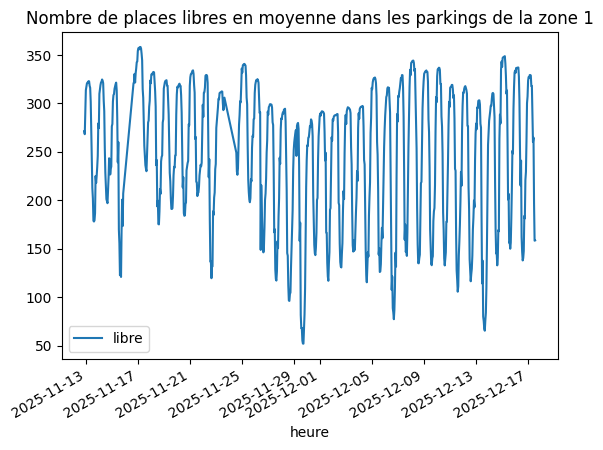

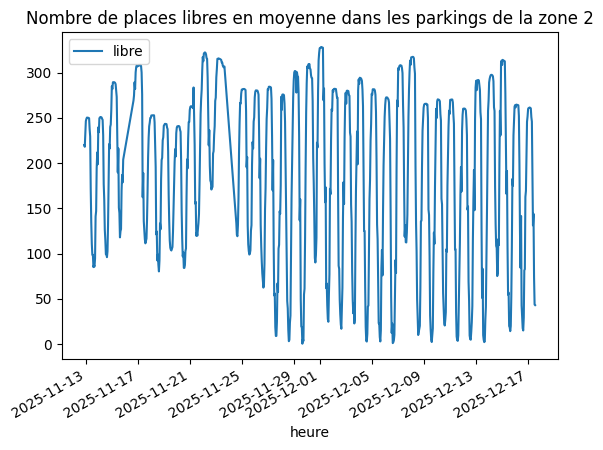

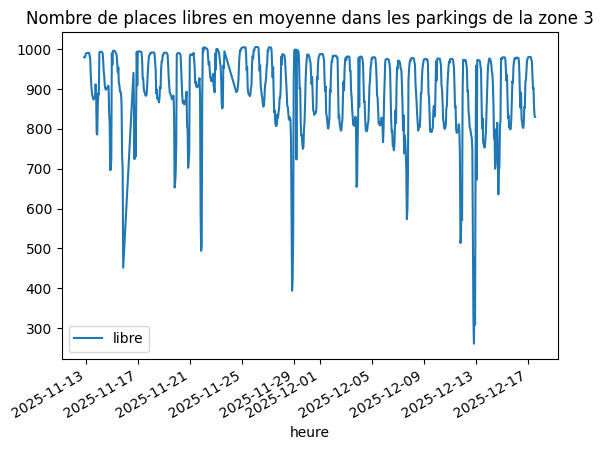

In [79]:
avg_libre_par_heure1.plot(x = "heure_arrondie", y = "libre", title = "Nombre de places libres en moyenne dans les parkings de la zone 1", xlabel="heure")
avg_libre_par_heure2.plot(x = "heure_arrondie", y = "libre",title = "Nombre de places libres en moyenne dans les parkings de la zone 2", xlabel="heure")
avg_libre_par_heure3.plot(x = "heure_arrondie", y = "libre",title = "Nombre de places libres en moyenne dans les parkings de la zone 3", xlabel="heure")

<Axes: title={'center': 'Nombre de places libres en moyenne dans les parkings classiques'}, xlabel='heure'>

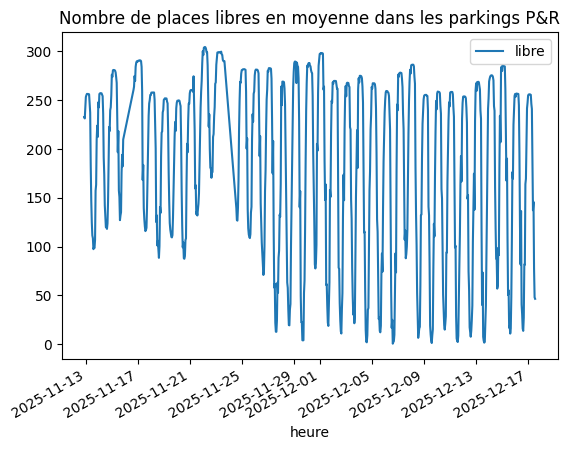

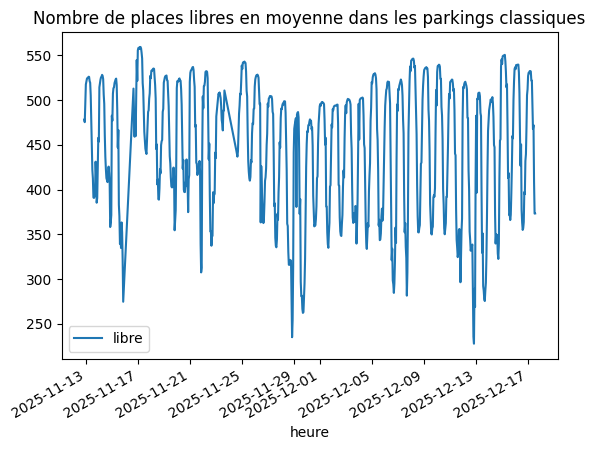

In [127]:
avg_libre_par_heure_PR = df_parking[df_parking['type']=="P&R"].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure_classique = df_parking[df_parking['type']!="P&R"].groupby('heure_arrondie')['libre'].mean().reset_index()
avg_libre_par_heure_PR.plot(x = "heure_arrondie", y = "libre", title = "Nombre de places libres en moyenne dans les parkings P&R", xlabel="heure")
avg_libre_par_heure_classique.plot(x = "heure_arrondie", y = "libre", title = "Nombre de places libres en moyenne dans les parkings classiques", xlabel="heure")